# Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

# creating a dataset

Here, I am creating a dataset with only two features so that we can visualize it easily. For creating the dataset I have created a function PointsInCircum which takes the radius and number of data points as arguments and returns an array of data points which when plotted forms a circle. We do this with the help of sin and cosine curves.

In [3]:
# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [4]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

<ipython-input-4-7c861c099697>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(300,700))
<ipython-input-4-7c861c099697>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(100,300))


In [5]:
df

,0,1
0,486.066453,25.778408
1,469.063700,5.653540
2,495.952822,-17.723863
3,487.682275,16.719243
4,409.335994,-15.309177
...,...,...
295,153.732913,-28.443713
296,24.139824,-96.543324
297,84.482805,-9.227719
298,40.585453,-7.492997


# Adding noise

In [6]:
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


<ipython-input-6-442b5f15ede1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


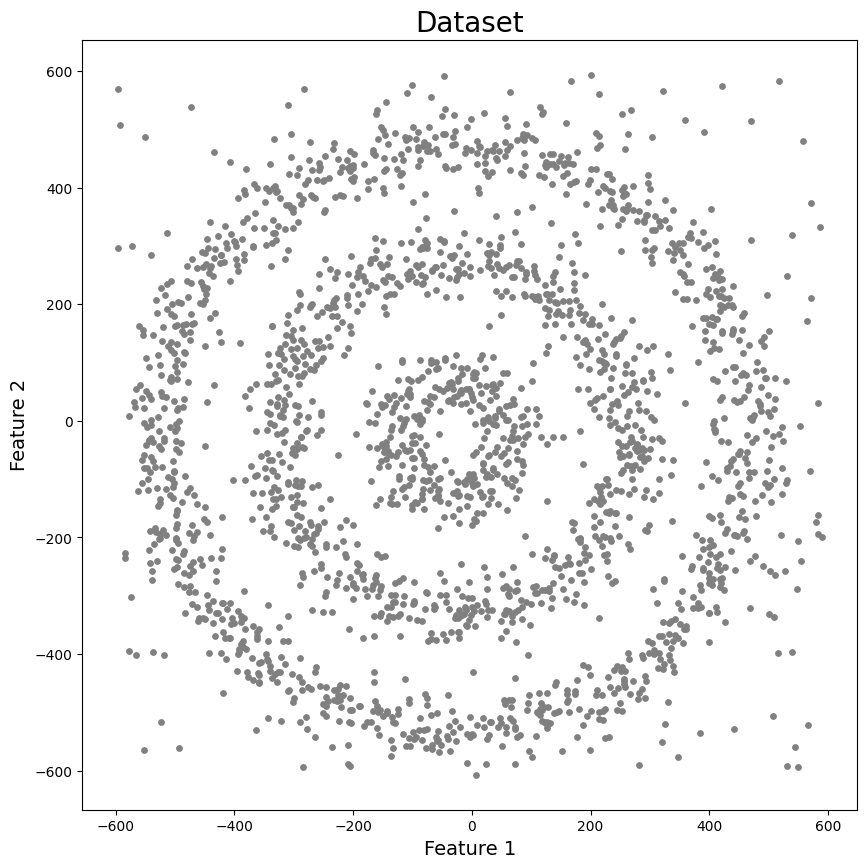

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# DBSCAN Clustering

In [11]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

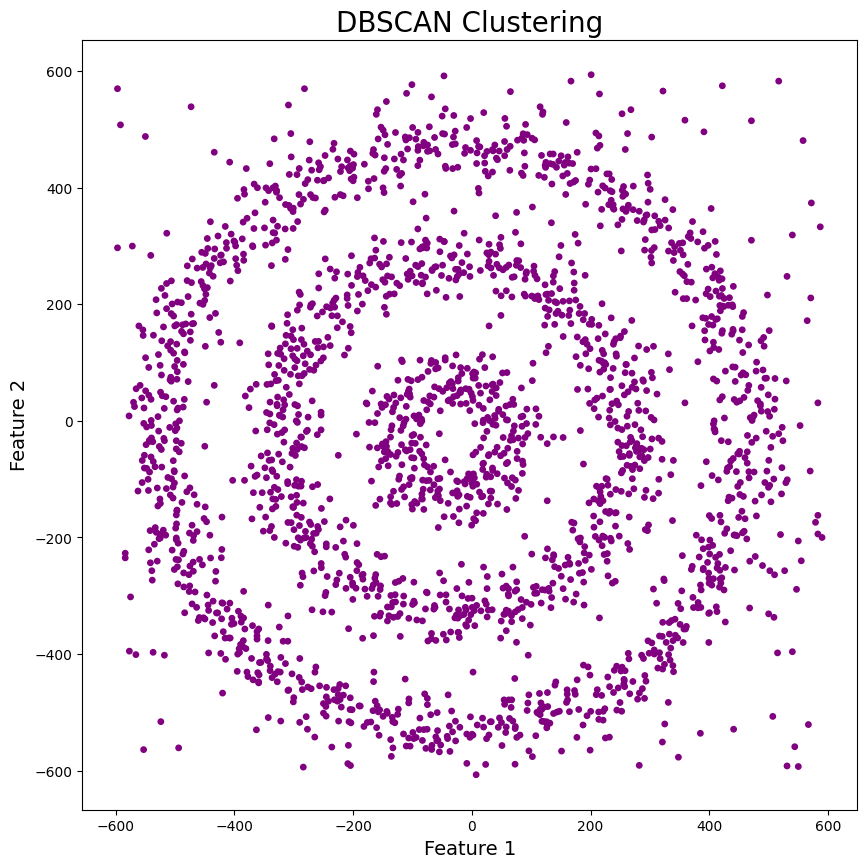

In [12]:
df['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
colors=['purple','red','blue','green']
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.

For epsilon, I am using the K-distance graph. For plotting a K-distance Graph

In [13]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

Let’s plot our K-distance graph and find the value of epsilon. Use the following syntax

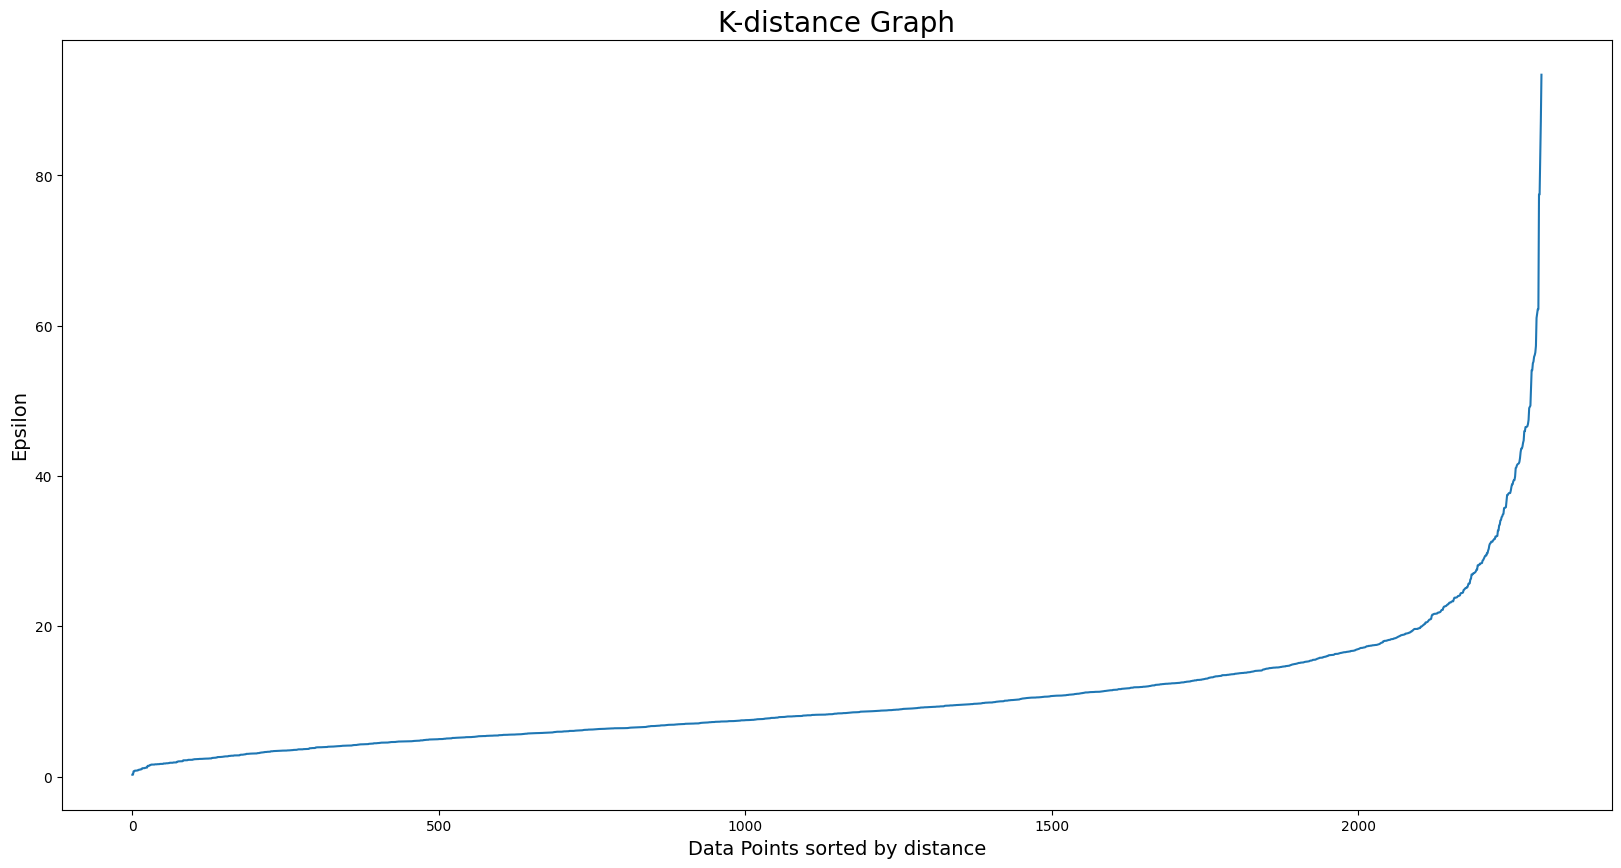

In [14]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case

In [15]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [16]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1041
 1     727
 2     309
-1     223
Name: DBSCAN_opt_labels, dtype: int64

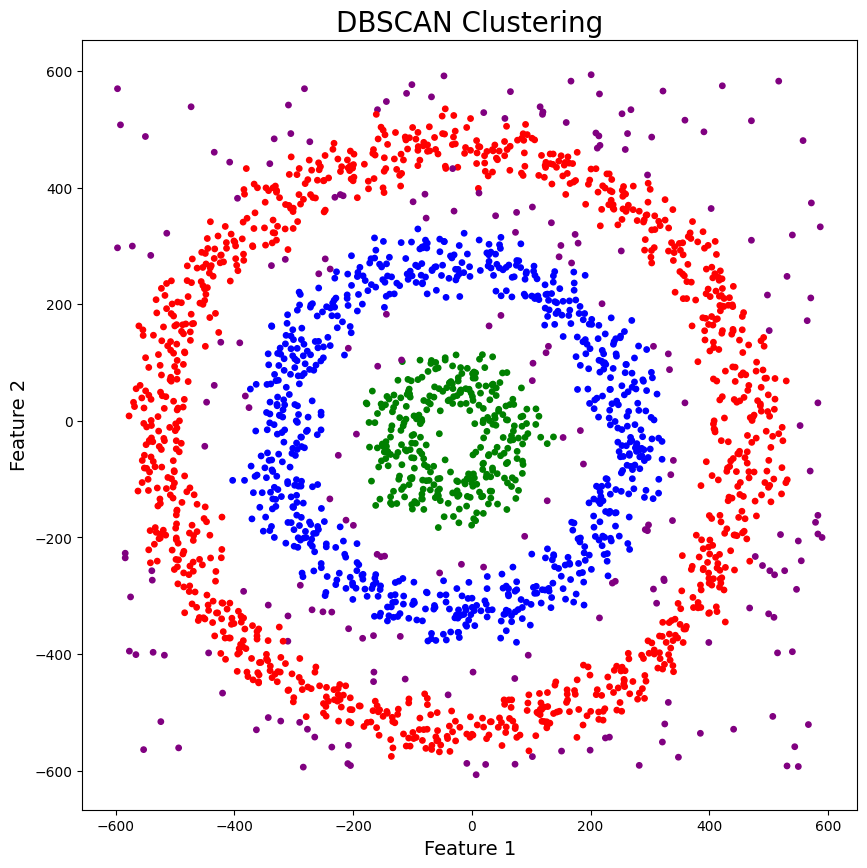

In [17]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

DBSCAN amazingly clustered the data points into three clusters, and it also detected noise in the dataset represented by the purple color.